## Mini Project 2  - Daisy World.
### Hadleigh Thompson, 16816143
### ATSC 409 - Nov 2015

### Introduction
For this project we are required to introduce predators and prey to dasiy world, in the form of Rabbits (that eat daisies) and Foxes (that prey on the rabbits).

We have already seen in lab 5 the coupling between temperature and daisy coverage - and we expect to see additional coupling with  daisies / rabbits and rabbits / foxes. The desired final state is a non-zero population for all four, with possible pedator/prey oscilations. 

Note: this notebook is self-contained with saved plots of various states and coefficients. To run this notebook as the working notebook that created the integrator instance and produced the plots, the additional required elements include:
    - miniproject2_hthompson.ipynb (this notebook)
    - miniproject.yaml (associted input values)
    - miniproject_functions.py (creation of the integrator class)
    - miniproject_integrator54.py (integrator instance using the input values from miniproject.yaml)
These can all be found in the miniproject2 folder.

The runge kutta method used in lab 5 is our basis for the adaptive step size routine, where we use the 'timeloop5err( )' function. The adaptive tolerances will initially remain the same as adative.yaml where:
```yaml
adaptvars:
  dtpassmin: 0.1
  dtfailmax: 0.5
  dtfailmin: 0.1
  s: 0.9
  rtol: 1.0e-05
  atol: 1.0e-05
  maxsteps: 2000.0
  maxfail: 60.0
  dtpassmax: 5.0
```

### Initial Dasiy world equations
The fuctions used in lab 5 were based on equations:

$\frac{dA_w}{dt} = A_w ( \beta_w x - \chi)$ 

$\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)$ 

$x = 1 - A_w - A_b$

$\beta_i = 1.0 - 0.003265(295.5 K -T_i)^2$

$T^4_i = R L \frac{S_0}{4\sigma}(\alpha_p-\alpha_i) + T^4_e$

$\alpha_p = A_w\alpha_w + A_b\alpha_b + A_g\alpha_g$

$T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)$

Our aim now is to alter the first two equations where the fractional coverage of daisies will be modified by the amount of rabbits, and to introduce two more equations to provide the rate of change of rabbits and foxes and any time t.

### New Daisy world equations

Accounting for Rabbits eating dasies, the modified daisy equations then become:

$$\frac{dA_w}{dt} = A_w (\beta_w x - \chi_w - \psi A_R)$$ 

$$\frac{dA_b}{dt} = A_b (\beta_b x - \chi_b - \psi A_R)$$

Where $\psi$ is the fraction of daisies that the rabbits eat, out of all the white and black daisies avaliable. This is assuming the rabbits do not have a preference for a particular colour of daisy, but also assuming that the amount that the rabbits eat is proportional to the amount of daisies available. This consideration models rabbits having to travel a distance to find daisies, and the more daisies there are, the more they eat. The main aspect of this assuption that could be considered non physical is that the rabbits will never eat the last daisy, (maybe they have taken Math 360 and understand proportional harvesting rates). 

Now we need to create an equation for the rate of change of rabbits - which should include a birthrate proportional to the amount of daisies that the rabbits can find, and the likelihood of finding another rabbit. This is obviously tempered with a rabbit death rate and by the rabbits being hunted by foxes.

That is:

$$\frac{dR}{dt} = A_R((\beta_R)(1-x) - \chi_R - \epsilon A_F)$$

The $(1-x)$ represents fractional coverage of all dasies since $x$ is defined as the fraction of bare ground $x = (1-A_w-A_b)$. We assume that the birthrate is dependent on this value since without a food supply, we should see a decline in the rabbit population. $\epsilon \  A_F$ represents the variable predation of rabbits ($\epsilon$) by a population of foxes ($A_F$), which is analogous to the rabbit consumption of daisies as mentioned above, and comes with the same assumptions.


In the absence of any larger predators, the rate of change of foxes will be proptional to the likelihood of a fox meeting another fox, and of food supply (once again, a lack of food supply assumes to a decline in birthrate) - and of a deathrate constant.

$$\frac{dF}{dt} = A_F((\beta_F)(A_R) - \chi_F)$$

#### Notation:
To be clear on the notation used in both notebook and code:
- $\beta_i$ = birth rates = beta
- $\chi_i$ = death rates = chi
- $\psi$ = rate that rabbits eat daisies = psi
- $\epsilon$ = rate that foxes eat rabbits = epsilon

### Application of the Runge Kutta method and resultant plots

The integrator instance from integrator54 (lab 5) was modified to obtain a 1 x 4 vector to account for the four equations as listed above. This can be found here in [miniproject_integrator54.py](https://github.com/hadleigh/numeric/blob/miniproject2/miniproject2/miniproject_integrator54.py)
The associated yaml file with the new coeffcients can be found under [miniproject.yaml](https://github.com/hadleigh/numeric/blob/miniproject2/miniproject2/miniproject.yaml) and contains the orignal first steady state coefficients as shown below.

As mentioned above, the timelooperr5 function was used, which provided an adaptive runge kutta method and allowed for the greatest amount of accurancy.

The first steady state that was obtained is shown below. This is with coefficients of:
```yaml
chiw: 0.3
chib: 0.3
chiR: 0.3
chiF: 0.15
psi: 0.4
beta_R: 0.6
beta_F: 0.6
epsilon: 0.3
whiteconc: 0.6
blackconc: 0.3
rabbitconc: 0.2
foxconc: 0.2
```

The considerations behind these: 
   - low initial populations of foxes and rabbits
   - lower death rate for foxes because they live longer than daisies and rabbits
   - moderate birth rates for rabbits and foxes, and moderate consuption rates for daisies and rabbits

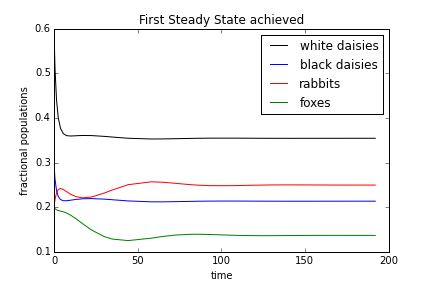

In [122]:
#First Steady State
Image(filename="images/first_steadystate.png")

We could hypothesis that the birth rate for rabbits and foxes can be elevated due due to it $already$ being dependent on food source, (that is, if enough food is present there are few factors that would hinder a high birth rate). Similarly, the death rate for daisies can be reduced due the reduction of the daisy population is already accounted for by the rabbits consumption of them (only a very small amount of them make it to a natural death, they are more likley to be eaten by a rabbit).

Then if we modify our first steady state coeff:
```yaml
chiw: 0.15
chib: 0.15
beta_R: 0.8
beta_F: 0.7
```
We get a steady state, but with some oscillations caused the altering of the above mentioned coefficients:

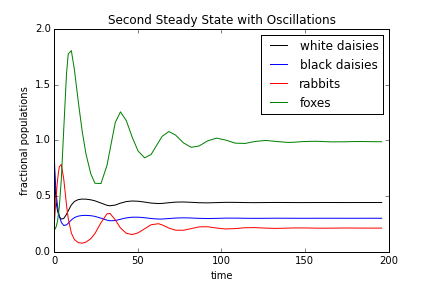

In [123]:
#Second Steady state with Oscillations
Image(filename="images/second_steadystate1.png")

In fact, if we contiue to increase the rabbit birh rate we see an substantial increase in the fox population, which confirms our coupling hypothesis from earlier.

Below is the plot with 
```yaml
beta_R: 1.2
```
all other coeff as previous.

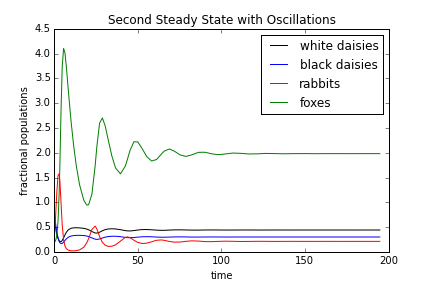

In [124]:
#Second Steady state with Oscillations
Image(filename="images/second_steadystate2.png")

For a different set of circumstances:

Let us start with a planet covered in daisies, and no bare ground.
```yaml
whiteconc: 0.2
blackconc: 0.8
```

Suppose the solar luminosity increases marginally, from 
```yaml
L: 1.0 
```
to 
```yaml
L: 1.1 
```
and this in turn causes breeding conditions to improve for rabbits but lessen somewhat for foxes:
```yaml
beta_R: 1.2
beta_F: 0.7
```
We could also interpt these differences by: 
- foxes are more likley to have a smaller litter of newborns compared to rabbits
- that a rabbit gestation period is shorter than a foxes, and therefore able to reproduce faster

We hypothesis that these great feeding conditions for foxes then result in an increase in fox death rate:
```yaml
chi_F: 0.4
```
(Perhaps due to overeating ? !)

Whatever the cause, we do get some nice oscillations:

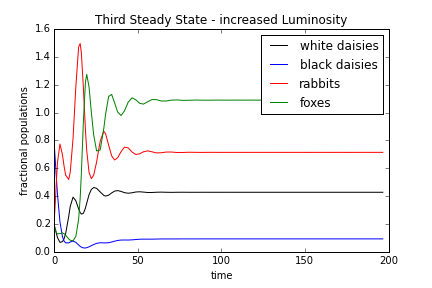

In [125]:
#Third Steady state
Image(filename="images/third_steadystate1.png")

In fact - if we contrast the above plot that has an 
```yaml 
L: 1.1
```
with a luminosity of 
```yaml
L: 1.0
```
seen below, we get a very different transient solution before we see esentially the same final steady state (although we can see the black daisies prefer the lower luminosity):

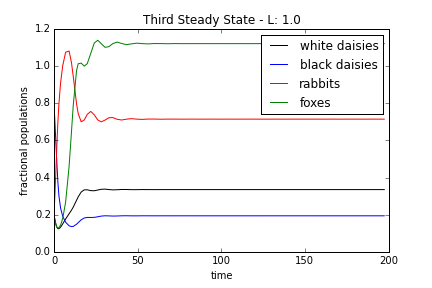

In [126]:
#Third Steady state
Image(filename="images/third_steadystate2.png")

### Summary

Using the equations:
$$\frac{dA_w}{dt} = A_w (\beta_w x - \chi_w - \psi A_R)$$ 

$$\frac{dA_b}{dt} = A_b (\beta_b x - \chi_b - \psi A_R)$$

$$\frac{dR}{dt} = A_R((\beta_R)(1-x) - \chi_R - \epsilon A_F)$$

$$\frac{dF}{dt} = A_F((\beta_F)(A_R) - \chi_F)$$

we can indeed find steady state solutions for the four elements of dasiy world to co-exist (white daisies, black daisies, rabbits, and foxes). 

Our assumptions include:
- rabbits eat daisies at a rate proportional to the amount of daisies available
- foxes eat rabbits at a rate proportional to the amount of rabbits available
- rabbits and foxes both have birth rates proportional to the amount of food available
- daisies and rabbits have both a consumption rate and a natural death rate; foxes have only a natural death rate due to no larger predators.

A range of coeffcients can be used as mentioned above - even though they may be uncoupled from a real world situation (ie. single predators, constant birth and death rates, no seasons on Daisy world).


### Code used to create the integ54 instance, and display the plots

(Note: code is commented out to allow the notebook to be run stand-alone. Uncomment to create instance with associated files as mentioned.)

In [127]:
""""
import miniproject2.miniproject_functions
from miniproject2.miniproject_functions import Integrator
#from importlib import reload
#reload(miniproject2.miniproject_integrator54)
from miniproject2.miniproject_integrator54 import miniproject_integ54
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=miniproject_integ54('miniproject.yaml')
timeVals,yVals,errorList=theSolver.timeloop5Err()

yvals=pd.DataFrame.from_records(yVals,columns=['white','black','rabbits','foxes'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'k',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'b',label='black daisies')
theLine2,=theAx.plot(timeVals,yvals['rabbits'], 'r',label='rabbits')
theLine3,=theAx.plot(timeVals,yvals['foxes'], 'g',label='foxes')
theAx.set_title('Third Steady State - L: 1.0')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional populations')
out=theAx.legend(loc='best')

plt.savefig('images/third_steadystate2.png', format='png')
"""


'"\nimport miniproject2.miniproject_functions\nfrom miniproject2.miniproject_functions import Integrator\n#from importlib import reload\n#reload(miniproject2.miniproject_integrator54)\nfrom miniproject2.miniproject_integrator54 import miniproject_integ54\nfrom IPython.display import Image\n%matplotlib inline\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\ntheSolver=miniproject_integ54(\'miniproject.yaml\')\ntimeVals,yVals,errorList=theSolver.timeloop5Err()\n\nyvals=pd.DataFrame.from_records(yVals,columns=[\'white\',\'black\',\'rabbits\',\'foxes\'])\n\nthefig,theAx=plt.subplots(1,1)\n\npoints,=theAx.plot(timeVals,yvals[\'white\'],\'k\',label=\'white daisies\')\npoints.set_markersize(12)\ntheLine1,=theAx.plot(timeVals,yvals[\'black\'],\'b\',label=\'black daisies\')\ntheLine2,=theAx.plot(timeVals,yvals[\'rabbits\'], \'r\',label=\'rabbits\')\ntheLine3,=theAx.plot(timeVals,yvals[\'foxes\'], \'g\',label=\'foxes\')\ntheAx.set_title(\'Third Steady State - L: 1.0\')\ntheAx.set_xlabel(\